In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from ethno import EthnoModel, EthnoAgent

In [2]:
# m = EthnoModel(5,50,50,1,0.005,1,[0b00, 0b01, 0b10, 0b11], max_iters=1000)

In [3]:
%%time
# m.run_model()
# data = m.datacollector.get_model_vars_dataframe()
# ax = data[["Ethnocentric","Humanitarian", "Selfish", "Traitor"]].plot()
# ax.set_title("Population and Behavior Over Time")
# ax.set_xlabel("Step")
# ax.set_ylabel("Number of Agents")
# _ = ax.legend(bbox_to_anchor=(1.35, 1.025))

winners = []
for _ in range(10):
    m = EthnoModel(5,50,50,1,0.005,1,[0b00, 0b01, 0b10, 0b11], max_iters=2000)
    m.run_model()
    data = m.datacollector.get_model_vars_dataframe()
    S_mean_count = (data.Selfish[1900:].get_values().mean(),'S')
    T_mean_count = (data.Traitor[1900:].get_values().mean(),'T')
    E_mean_count = (data.Ethnocentric[1900:].get_values().mean(),'E')
    H_mean_count = (data.Humanitarian[1900:].get_values().mean(),'H')
    winners.append(max(S_mean_count,T_mean_count,E_mean_count,H_mean_count)[1])

Wall time: 26min 59s


In [4]:
winners

['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T']

In [15]:
agg = {}
for i in range(11):
    misp = i/10.0
    m = EthnoModel(5,50,50,1,0.005,misp,[0b00, 0b01, 0b10, 0b11], max_iters=2000)
    m.run_model()
    data = m.datacollector.get_model_vars_dataframe()
    S_mean_count = data.Selfish[1900:].get_values().mean()
    T_mean_count = data.Traitor[1900:].get_values().mean()
    E_mean_count = data.Ethnocentric[1900:].get_values().mean()
    H_mean_count = data.Humanitarian[1900:].get_values().mean()
    agg[misp] = [S_mean_count,T_mean_count,E_mean_count,H_mean_count]

In [16]:
agg_table = pd.DataFrame(agg).transpose()
agg_table.columns = ['S','T','E','H']

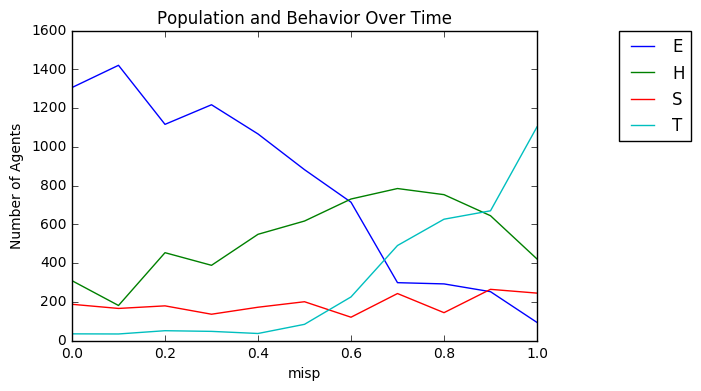

In [17]:
ax = agg_table[["E","H", "S", "T"]].plot()
ax.set_title("Population and Behavior Over Time")
ax.set_xlabel("misp")
ax.set_ylabel("Number of Agents")
_ = ax.legend(bbox_to_anchor=(1.35, 1.025))

In [4]:
m = EthnoModel(5,50,50,1,0.005,.1,[0b00, 0b01, 0b10, 0b11], max_iters=500)
m.run_model()
m.total_coops / m.total_interactions

0.744353621217273